# IMPORT DE DONNEES

In [1]:
#VISUALISATION ET IMPORT DE DONNEES
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns



#SKLEARN FUNCTIONS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import joblib


########################      PRE-PROCESSING      #############################


#ouverture et lecture des deux fichiers csv : frequences propres et entrées 
freq = pd.read_csv(open("testPOC.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dictPOC.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################




#######################      TRAIN_TEST_SPLIT      ############################
# 70% de la population sera allouée à l'apprentissage, 30 % pour le test
population_train = 0.7

# mélange et séparation de nos données en 2 datasets  
split_train, split_test = train_test_split(datas, train_size=population_train)

# On extrait les données qui serviront d'objectif à atteindre, soit ici les 
# 8 fréquences propres à prédire

entrees = ['L_tot','rho', 'h', 'b']
split_target_train = split_train.drop(columns=entrees)
split_target_test = split_test.drop(columns=entrees)


frequences = ["freq1"]
split_train = split_train.drop(columns=frequences)
split_test = split_test.drop(columns=frequences)

print("entrées train : \n",split_train)
print("target train : \n", split_target_train)

#split_train = entrees servant à entrainer le modèle
#split test = entrees servant à tester le modèle
#split_target_train = sorties d'entrainement du modèle
#split_target_test = sorties de test du modèle 


#######################      FIN TR_TST_SPLIT      ############################

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


         L_tot   rho         h         b       freq1
0     0.288160  2700  0.005500  0.009846   54.090599
1     0.172119  2400  0.008618  0.010560  166.140594
2     0.677284  2400  0.042307  0.044046   52.675499
3     0.957810  4510  0.080897  0.078160   71.617699
4     0.530750  2700  0.006690  0.006449   19.395201
...        ...   ...       ...       ...         ...
9995  0.946155  7800  0.050133  0.062122   46.150902
9996  0.333653  7850  0.018539  0.028223  139.140503
9997  0.204040  7850  0.004373  0.011738   87.760803
9998  0.289012  7800  0.017508  0.012411  172.734207
9999  0.698311  4510  0.056114  0.056225   93.457802

[10000 rows x 5 columns]
entrées train : 
          L_tot   rho         h         b
29    0.536769  8900  0.035467  0.051067
5196  0.307661  7800  0.016804  0.027548
9969  0.770415  2700  0.013474  0.037569
8735  0.828861  2700  0.048977  0.045277
3729  0.773110  7850  0.022041  0.051748
...        ...   ...       ...       ...
4720  0.980423  7850  0.076058  0

# PROCESSING

In [54]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [55]:
"""my_grid_poly ={'polynomialfeatures__degree': [9],
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}


poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
grid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)
#print best score and model
# Ravel plit_target_train
grid_search.fit(split_train, split_target_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)"""

"my_grid_poly ={'polynomialfeatures__degree': [9],\n                'linearregression__fit_intercept': [True, False],\n                'linearregression__normalize': [True, False]}\n\n\npoly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)\ngrid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)\n#print best score and model\n# Ravel plit_target_train\ngrid_search.fit(split_train, split_target_train)\nprint(grid_search.best_score_)\nprint(grid_search.best_estimator_)\nprint(grid_search.best_params_)"

In [56]:
poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 0.9986346783865329


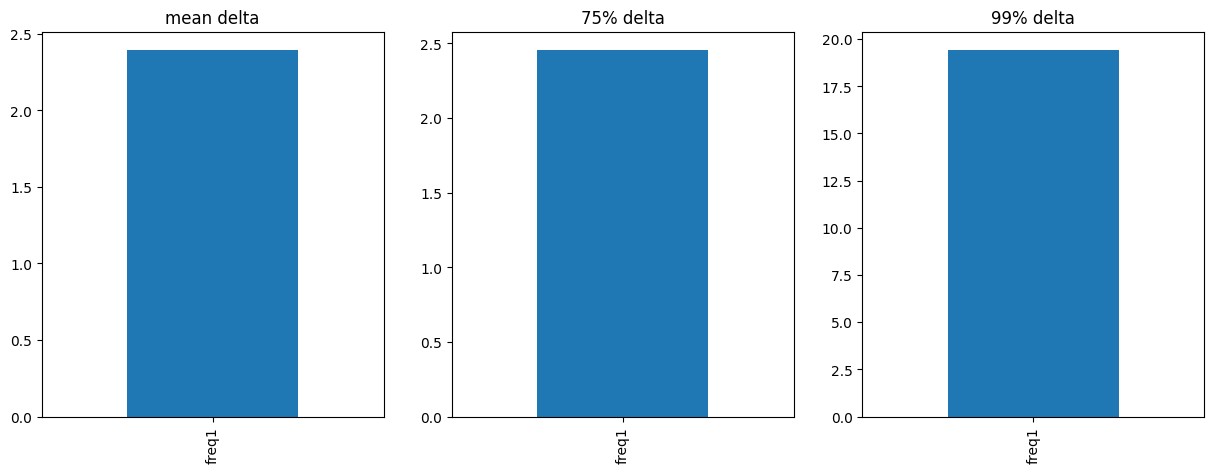

In [89]:
pred = poly_reg_model.predict(split_test)
delta = abs(pred - split_target_test)
mean_delta = delta.mean()
delta_75 = delta.quantile(0.75)
delta_99 = delta.quantile(0.99)
# plot mean delta , 75% delta and 99% delta side by side in same scale
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
mean_delta.plot(kind='bar', ax=ax[0], title='mean delta')
delta_75.plot(kind='bar', ax=ax[1], title='75% delta')
delta_99.plot(kind='bar', ax=ax[2], title='99% delta')

plt.show()




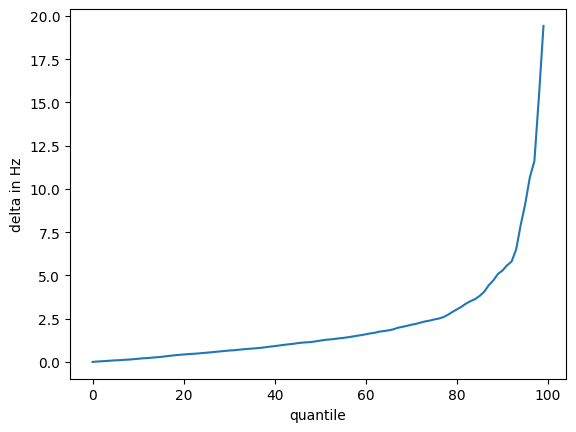

In [88]:
quantile = []
for i in range(0,100):
    quantile.append(delta.quantile(i/100))
plt.plot(quantile)
# legend y delta in Hz
plt.ylabel('delta in Hz')
plt.xlabel('quantile')
plt.show()
    

In [58]:
print("mean delta : \n", mean_delta)
print("75% delta : \n", delta_75)
print("99% delta : \n", delta_99)
print("95% delta : \n", delta.quantile(0.95))

mean delta : 
 freq1    1.903096
dtype: float64
75% delta : 
 freq1    2.198054
Name: 0.75, dtype: float64
99% delta : 
 freq1    15.413368
Name: 0.99, dtype: float64
95% delta : 
 freq1    6.259106
Name: 0.95, dtype: float64


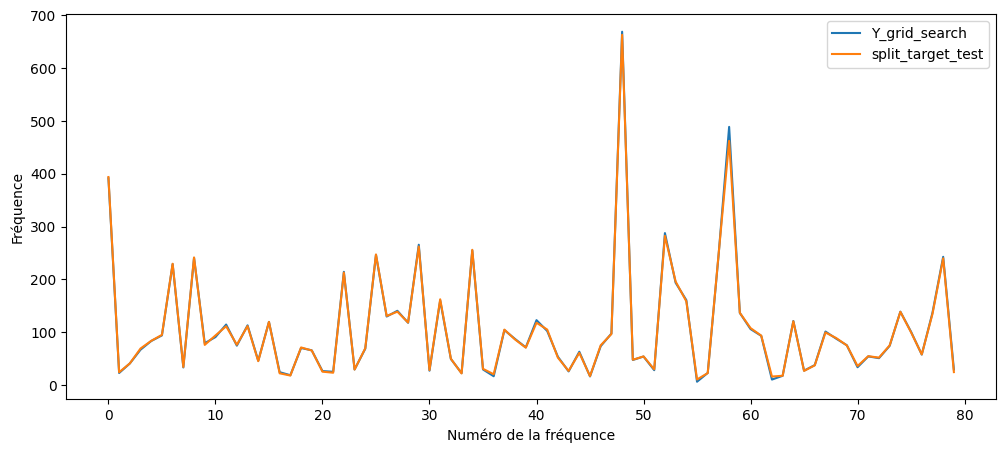

In [17]:
Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
# make name of Y axis "Fréquence"
plt.ylabel("Fréquence")
# make name of X axis "Numéro de la fréquence"
plt.xlabel("Numéro de la fréquence")
plt.show()


In [9]:
from sklearn.pipeline import Pipeline


polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(split_train, split_target_train)
print("",pipeline.score(split_test, split_target_test))

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 0.9988864947030847


# PASSAGE A L'EVALUATION DU MODELE EN FONCTION DU NOMBRE DE DONNEES

In [24]:
freq = pd.read_csv(open("test10el.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict10el.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################


          L_tot   rho         h         b       freq1
0      0.107854  2700  0.010595  0.004782  743.825989
1      0.963487  7850  0.022054  0.059100   19.849300
2      0.855746  7850  0.079650  0.048035   90.876297
3      0.657111  4510  0.008149  0.024741   15.327500
4      0.108837  2500  0.007384  0.003889  529.052307
...         ...   ...       ...       ...         ...
99995  0.425659  2400  0.019574  0.008568   61.702099
99996  0.889934  8900  0.066700  0.079108   50.781300
99997  0.180274  2700  0.014730  0.007937  370.140991
99998  0.431294  2500  0.031679  0.022028  144.532394
99999  0.793565  2400  0.037652  0.060480   34.147800

[100000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

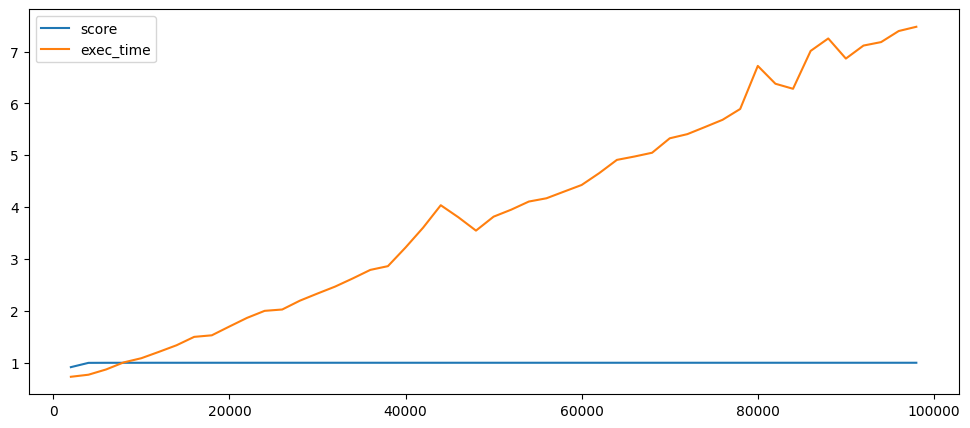

[0.9144959963437245, 0.99722478557773, 0.9983148043178253, 0.9986576290039514, 0.9986883189144213, 0.9990586962664103, 0.9989669749283205, 0.9991354498604985, 0.9990405910063306, 0.9990825996080356, 0.9989894854784616, 0.9991507957310455, 0.9991470114577361, 0.9991222006599503, 0.9990492168970259, 0.9991686070348326, 0.9990767784516241, 0.9991342906646191, 0.9989934882311794, 0.9991129283662378, 0.999090387102001, 0.9989814147616626, 0.9991702294939507, 0.999109714013681, 0.9990777150145226, 0.9990625656703265, 0.99911467925703, 0.999094837854432, 0.9991992390900712, 0.9991203383474299, 0.9990627174371278, 0.9991054182254677, 0.9991485948667939, 0.9991387701530274, 0.9991291993130766, 0.999127480898184, 0.9991481023023129, 0.9991013394010362, 0.999140806138309, 0.9991404829422772, 0.9991164534359065, 0.999137332022384, 0.9991280890988887, 0.9991617719795679, 0.9991486863160509, 0.9991140096458215, 0.9991584231531357, 0.9991842323106715, 0.9991254455340304]
[0.7287969589233398, 0.768651

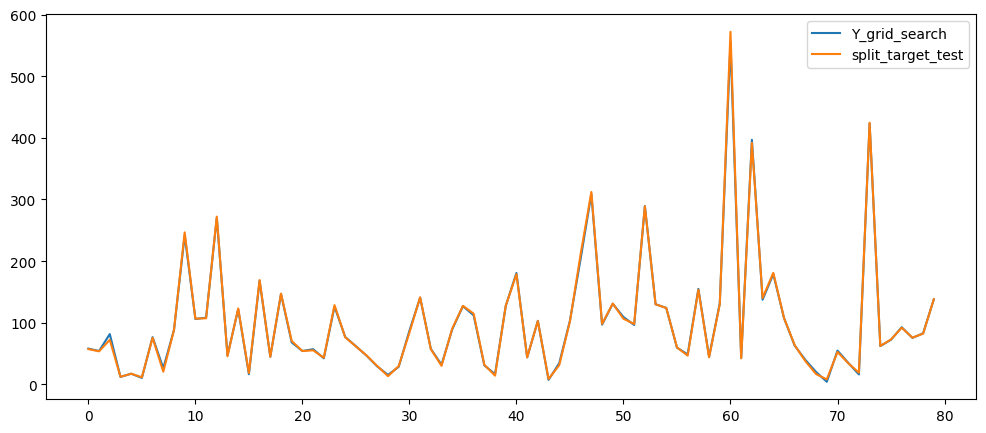

In [25]:
# keep 10000 random values of datas
import time


score = []
nbr_values = []
exec_time = []

for i in range(2000,100000,2000):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

# show best ratio score / exec_time





    





## Entrainement 100 elements finnis


In [67]:
freq = pd.read_csv(open("test100.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict100.csv", "r"),
                    delimiter=",")

# delete last column of inputs
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################

         L_tot   rho         h         b       freq1
0     0.384477  4510  0.028018  0.026937  153.938705
1     0.749060  8900  0.014586  0.069854   15.674900
2     0.816123  4510  0.073874  0.050625   90.078903
3     0.110065  8900  0.006346  0.005231  315.841492
4     0.717205  7850  0.030788  0.011665   50.009701
...        ...   ...       ...       ...         ...
4995  0.474135  2400  0.036221  0.014529   92.021400
4996  0.348351  7800  0.030695  0.027379  208.453201
4997  0.845470  2400  0.047405  0.025971   37.876301
4998  0.479964  2400  0.024620  0.029600   61.039902
4999  0.210392  8900  0.013121  0.020436  178.736496

[5000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

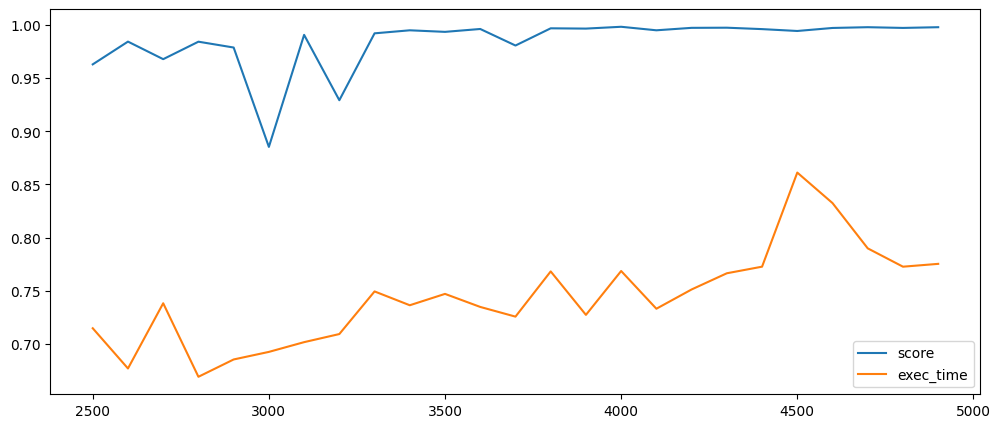

[0.9629776041084736, 0.984383118314324, 0.9678664760095796, 0.9843073966978614, 0.9788164725364458, 0.8853260510696612, 0.9907221982015478, 0.9292402388327385, 0.9921696660417119, 0.995022923529196, 0.9935539445064129, 0.9962621161802603, 0.9807017318030339, 0.9968971914333307, 0.9966289714479952, 0.9983383108788023, 0.9950306045073938, 0.9973324517592244, 0.9974691400722515, 0.9961382190517565, 0.99438253440765, 0.9972276342797177, 0.9979440365991655, 0.997263000637083, 0.9979371143182801]
[0.7146992683410645, 0.6768653392791748, 0.7382221221923828, 0.6690495014190674, 0.6853382587432861, 0.6924591064453125, 0.7016286849975586, 0.7092499732971191, 0.7493503093719482, 0.7363436222076416, 0.7470333576202393, 0.7347598075866699, 0.7256426811218262, 0.768183708190918, 0.7272861003875732, 0.7685697078704834, 0.7330684661865234, 0.7511975765228271, 0.7664294242858887, 0.7726390361785889, 0.8611674308776855, 0.8324606418609619, 0.7898657321929932, 0.7726242542266846, 0.7752869129180908]
[250

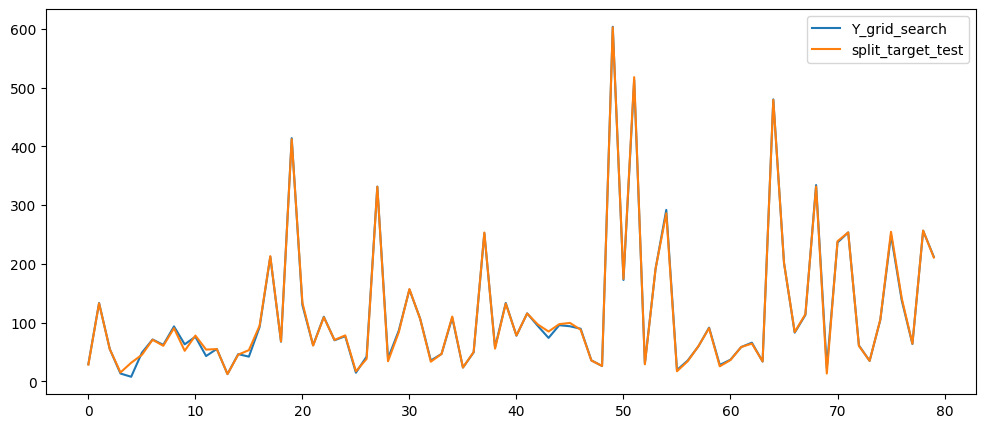

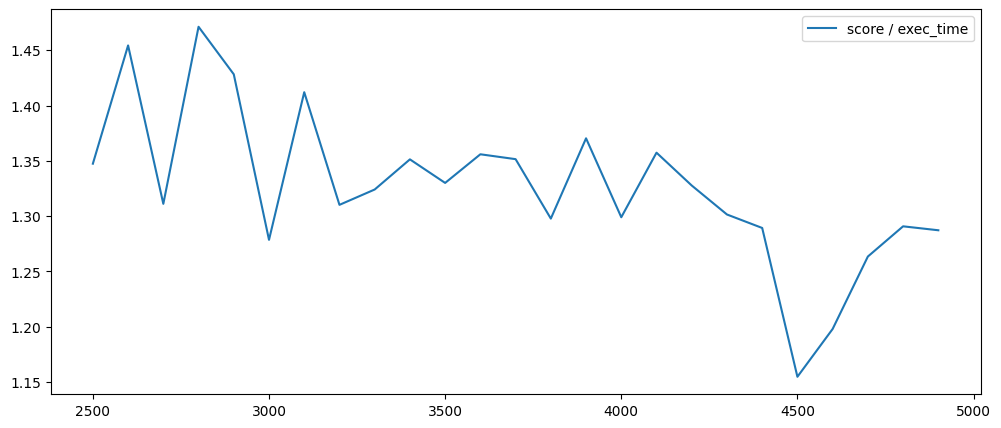

In [68]:
import time


score = []
nbr_values = []
exec_time = []

for i in range(2500,5000,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

for i in range(0, len(score)):
    score[i] = score[i] / exec_time[i]
  

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.legend(
    ['score / exec_time'])
plt.show()






mean delta 100 :  freq1    2.394133
dtype: float64
delta 100 75 :  freq1    2.456426
Name: 0.75, dtype: float64
delta 100 95 :  freq1    9.14521
Name: 0.95, dtype: float64
delta 100 99 :  freq1    19.427456
Name: 0.99, dtype: float64


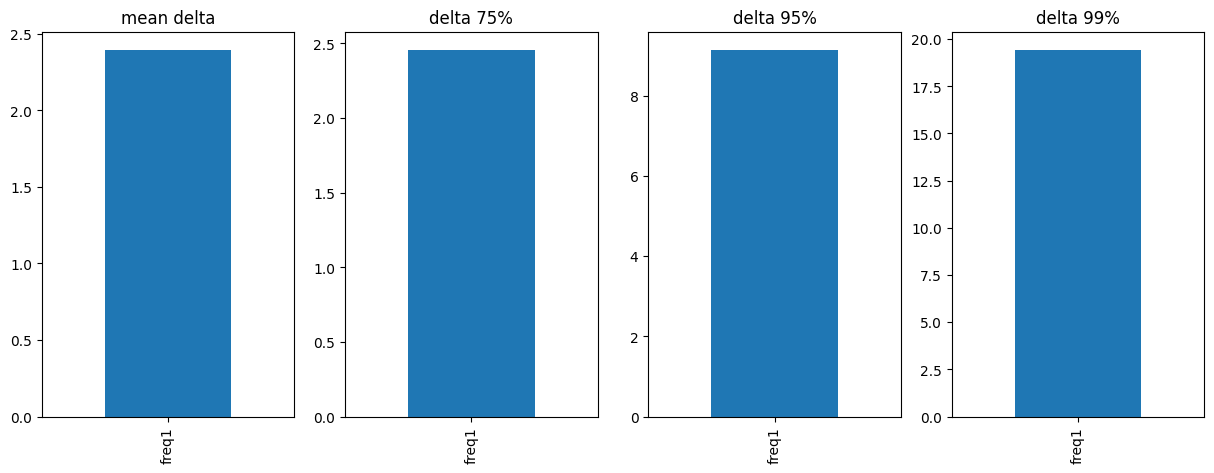

In [83]:
# make delta prediction - true value



delta_100 = abs(Y_pred - split_target_test)
mean_delta_100 = delta_100.mean()
delta_100_75 = delta_100.quantile(0.75)
delta_100_95 = delta_100.quantile(0.95)
delta_100_99 = delta_100.quantile(0.99)


print("mean delta 100 : ", mean_delta_100)
print("delta 100 75 : ", delta_100_75)
print("delta 100 95 : ", delta_100_95)
print("delta 100 99 : ", delta_100_99)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

mean_delta_100.plot(kind='bar', ax=ax[0], title='mean delta')
# write values of mean, 75%, 95%, 99% in the graph in the bar
delta_100_75.plot(kind='bar', ax=ax[1], title='delta 75%')
delta_100_95.plot(kind='bar', ax=ax[2], title='delta 95%')
delta_100_99.plot(kind='bar', ax=ax[3], title='delta 99%')





plt.show()


# plot values of delta side by side with bar and write values of mean, 75%, 95%, 99% in the graph




# Entrainement des modèles pour les autres formes de poutres


## Load et gestion des données

In [91]:
freq_cercle = pd.read_csv(open("gen_data/test_Cercle.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/dict_Cercle.csv", "r"),delimiter=",")



freq_cercle_creux = pd.read_csv(open("gen_data/test_Cercle_Creux.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/dict_Cercle_Creux.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("test10el.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("dict10el.csv", "r"),delimiter=",")

freq_rectangle100el = pd.read_csv(open("test100.csv", "r"),delimiter=",")
input_rectangle100el = pd.read_csv(open("dict100.csv", "r"),delimiter=",")

data_cercle = [input_cercle, freq_cercle]
data_cercle = pd.concat(data_cercle, axis=1)

data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
data_cercle_creux = pd.concat(data_cercle_creux, axis=1)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
data_rectangle_creux = pd.concat(data_rectangle_creux, axis=1)

data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)



to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences

data_cercle = data_cercle.drop(columns=to_drop)
data_cercle_creux = data_cercle_creux.drop(columns=to_drop)
data_rectangle_creux = data_rectangle_creux.drop(columns=to_drop)
data_rectangle = data_rectangle.drop(columns=to_drop_sans_mat)


split_train_cercle,split_test_cercle = train_test_split(data_cercle, train_size=population_train)
entrees_cercle = ['L_tot','rho', 'r']
split_target_train_cercle = split_train_cercle.drop(columns=entrees_cercle)
split_target_test_cercle = split_test_cercle.drop(columns=entrees_cercle)
split_train_cercle.head(10)
split_train_cercle = split_train_cercle.drop(columns=freq1)
split_test_cercle = split_test_cercle.drop(columns=freq1)
print(split_train_cercle)



split_train_cercle_creux,split_test_cercle_creux = train_test_split(data_cercle_creux, train_size=population_train)
entrees_cercle_creux = ['L_tot','rho', 'r_ext','r_int']
split_target_train_cercle_creux = split_train_cercle_creux.drop(columns=entrees_cercle_creux)
split_target_test_cercle_creux = split_test_cercle_creux.drop(columns=entrees_cercle_creux)
split_train_cercle_creux = split_train_cercle_creux.drop(columns=freq1)
split_test_cercle_creux = split_test_cercle_creux.drop(columns=freq1)


entrees_rectangle_creux = ['L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux = train_test_split(data_rectangle_creux, train_size=population_train)
split_target_train_rectangle_creux = split_train_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_target_test_rectangle_creux = split_test_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_train_rectangle_creux = split_train_rectangle_creux.drop(columns=freq1)
split_test_rectangle_creux = split_test_rectangle_creux.drop(columns=freq1)


entrees_rectangle = ['L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle = train_test_split(data_rectangle, train_size=population_train)
split_target_train_rectangle = split_train_rectangle.drop(columns=entrees_rectangle)
split_target_test_rectangle = split_test_rectangle.drop(columns=entrees_rectangle)
split_train_rectangle = split_train_rectangle.drop(columns=freq1)
split_test_rectangle = split_test_rectangle.drop(columns=freq1)


         L_tot   rho         r
461   0.831934  2700  0.081298
2190  0.456149  4510  0.031955
103   0.630300  2500  0.055621
262   0.431294  4510  0.009746
2325  0.424210  4510  0.009661
...        ...   ...       ...
1383  0.408922  7800  0.016285
1096  0.715577  7850  0.025017
53    0.396271  7850  0.009522
973   0.314465  8900  0.005533
871   0.108048  7800  0.003193

[1750 rows x 3 columns]


## Entrainement des modèles

In [28]:
for i in range(10,16):
    poly_reg_rectangle_creux = PolynomialRegression(i, fit_intercept=True, normalize=True)
    poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
    print(i,poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
    


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


: 

In [92]:
poly_reg_cercle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_cercle.fit(split_train_cercle, split_target_train_cercle)
poly_reg_cercle_creux = PolynomialRegression(6, fit_intercept=True, normalize=True)
poly_reg_cercle_creux.fit(split_train_cercle_creux, split_target_train_cercle_creux)
poly_reg_rectangle_creux = PolynomialRegression(6, fit_intercept=True, normalize=True)
poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
poly_reg_rectangle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle.fit(split_train_rectangle, split_target_train_rectangle)

Y_pred_cercle = poly_reg_cercle.predict(split_test_cercle)
Y_pred_cercle_creux = poly_reg_cercle_creux.predict(split_test_cercle_creux)
Y_pred_rectangle_creux = poly_reg_rectangle_creux.predict(split_test_rectangle_creux)
Y_pred_rectangle = poly_reg_rectangle.predict(split_test_rectangle)

# print score for each modèle
print("Cercle : ",poly_reg_cercle.score(split_test_cercle, split_target_test_cercle))
print("Cercle creux",poly_reg_cercle_creux.score(split_test_cercle_creux, split_target_test_cercle_creux))
print("Rectangle creuc",poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
print("Rectangle",poly_reg_rectangle.score(split_test_rectangle, split_target_test_rectangle))



c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

Cercle :  0.999044195639915
Cercle creux 0.9820570202682624
Rectangle creuc 0.9816970618780109
Rectangle 0.999113348139769


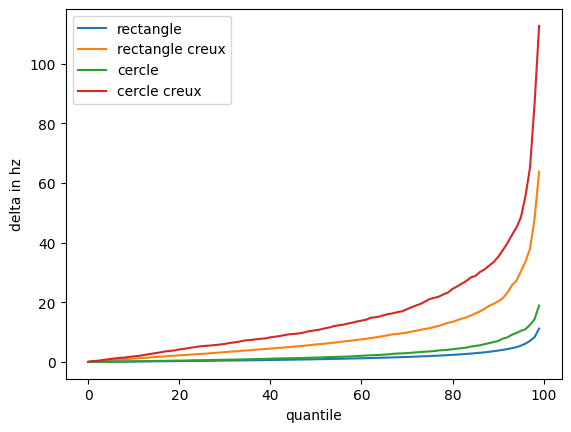

In [95]:
delta_rectangle = np.abs(split_target_test_rectangle - Y_pred_rectangle)
delta_rectangle_creux = np.abs(split_target_test_rectangle_creux - Y_pred_rectangle_creux)
delta_cercle = np.abs(split_target_test_cercle - Y_pred_cercle)
delta_cercle_creux = np.abs(split_target_test_cercle_creux - Y_pred_cercle_creux)

quantile_rectangle = []
for i in range(0,100):
    quantile_rectangle.append(np.quantile(delta_rectangle,i/100))


quantile_rectangle_creux = []
for i in range(0,100):
    quantile_rectangle_creux.append(np.quantile(delta_rectangle_creux,i/100))

quantile_cercle = []
for i in range(0,100):
    quantile_cercle.append(np.quantile(delta_cercle,i/100))

quantile_cercle_creux = []
for i in range(0,100):
    quantile_cercle_creux.append(np.quantile(delta_cercle_creux,i/100))


# plot on the same graph
plt.plot(quantile_rectangle, label="rectangle")
plt.plot(quantile_rectangle_creux, label="rectangle creux")
plt.plot(quantile_cercle, label="cercle")
plt.plot(quantile_cercle_creux, label="cercle creux")

plt.ylabel("delta in hz")
#
plt.xlabel("quantile")

plt.legend()





In [6]:
split_train_rectangle.head(10)

,L_tot,rho,h,b
68692,0.435687,4510,0.019980,0.031243
30353,0.716808,2700,0.015933,0.059033
83060,0.747944,2700,0.044350,0.019712
5807,0.422356,2500,0.028964,0.040489
52045,0.932230,2400,0.025416,0.030834
41884,0.850686,2400,0.026278,0.028548
32775,0.589060,7850,0.037538,0.048136
47258,0.429039,7800,0.012453,0.032701
41457,0.761052,4510,0.055239,0.039779
11165,0.255773,8900,0.006552,0.017969


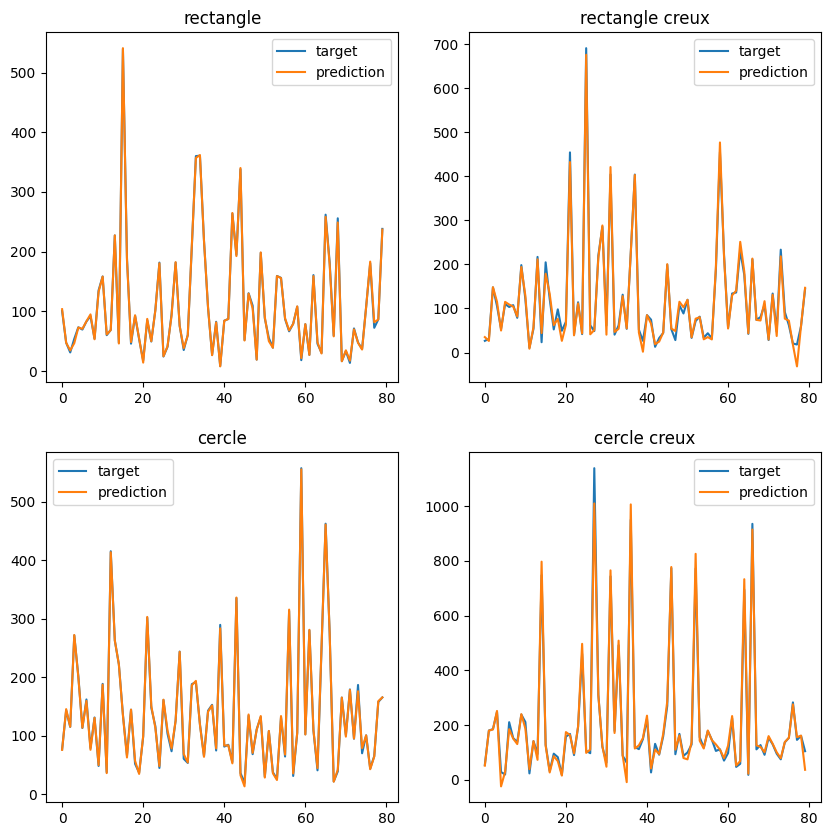

In [13]:
# plot 80 predictions for each model in a matrix 2 * 2 
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(np.array(split_target_test_rectangle[:80]), label="target")
plt.plot(Y_pred_rectangle[:80], label="prediction")
plt.title("rectangle")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(np.array(split_target_test_rectangle_creux[:80]), label="target")
plt.plot(Y_pred_rectangle_creux[:80], label="prediction")
plt.title("rectangle creux")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(np.array(split_target_test_cercle[:80]), label="target")
plt.plot(Y_pred_cercle[:80], label="prediction")
plt.title("cercle")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(np.array(split_target_test_cercle_creux[:80]), label="target")
plt.plot(Y_pred_cercle_creux[:80], label="prediction")
plt.title("cercle creux")
plt.legend()
plt.show()





In [8]:
# grid search for cercle_creux

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

my_grid_poly ={'polynomialfeatures__degree': [2],
                'linearregression__fit_intercept': [True],
                'linearregression__normalize': [True]}
grid = GridSearchCV(PolynomialRegression(), my_grid_poly, cv=2,verbose=10,n_jobs=-1)
grid.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
print(grid.best_params_)
print(grid.best_score_)

#best for rectangle creux : {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 4}
# score : 0.91 
# best param degré = 6 true true for 0.97 best score 

"""my_grid_rf ={'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200,300,400,500],
                'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'max_features':['auto'],
                'bootstrap':[True]}

#{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
#0.9472339926463627
# cercle creux 

{'bootstrap': True, 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9580550198774036
rectanlge creux
                
grid = GridSearchCV(RandomForestRegressor(), my_grid_rf, cv=3,verbose=1,n_jobs=-1)
grid.fit(split_test_rectangle_creux, split_target_test_rectangle_creux)"""
print(grid.best_params_)
print(grid.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
0.7538954542804697
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
0.7538954542804697


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


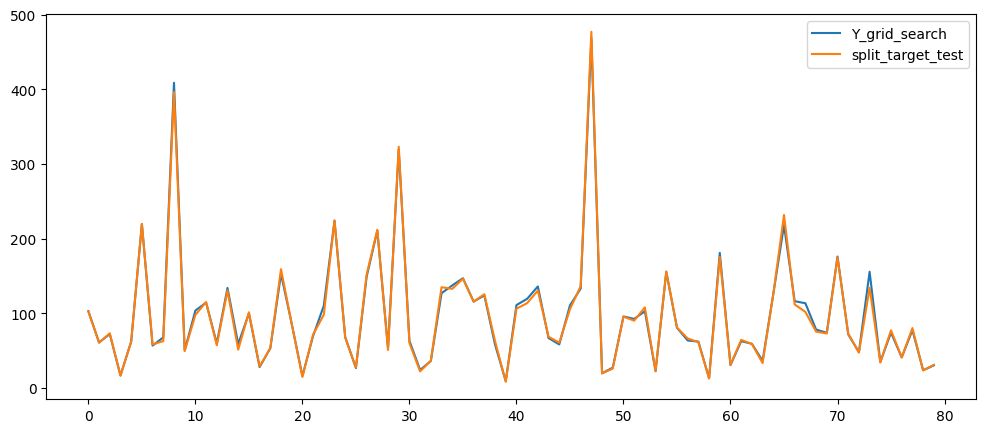

In [ ]:
"""# plot prediction
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle)[:80])
plt.plot((np.array(split_target_test_cercle)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle_creux)[:80])
plt.plot((np.array(split_target_test_cercle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()"""

# plot prediction for rectangle creux
Y_pred_rectangle_creux = grid.predict(split_test_rectangle_creux)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

In [ ]:
# save all 4 models with pickle
with open('model_cercle.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle, f)
with open('model_cercle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle_creux, f)
with open('model_rectangle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle_creux, f)
with open('model_rectangle.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle, f)



# Apprentissage avec variation Elements finnis

In [2]:
def split_and_drop(data,nbr_sample,input_features,droped_features,population_train):

    data  = pd.concat(data, axis=1)
    data = data.sample(n=nbr_sample)
    data = data.drop(droped_features, axis=1)
    split_train,split_test = train_test_split(data, train_size=population_train)
    print(split_train)
    split_target_train = split_train.drop(columns=input_features)
    split_target_test = split_test.drop(columns=input_features)
    split_train = split_train.drop(columns="freq1")
    split_test = split_test.drop(columns="freq1")
    return split_train,split_test,split_target_train,split_target_test



In [3]:
freq_cercle = pd.read_csv(open("gen_data/var_elts/test_Cercle_var.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/var_elts/dict_Cercle_var.csv", "r"),delimiter=",")

freq_cercle_creux = pd.read_csv(open("gen_data/var_elts/test_Cercle_Creux_var.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/var_elts/dict_Cercle_Creux_var.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/var_elts/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/var_elts/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("gen_data/var_elts/test_Rectangle_var.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("gen_data/var_elts/dict_Rectangle_var.csv", "r"),delimiter=",")

freq_100el = pd.read_csv(open("test100.csv","r"),delimiter=",")
input_100el = pd.read_csv(open("dict100.csv","r"),delimiter=",")



data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]


data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)
data_rectangle = data_rectangle.sample(n=15000)


to_drop = ['S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences


data_cercle = [input_cercle, freq_cercle]
entrees_cercle = ['NbElts','L_tot','rho', 'r']
split_train_cercle,split_test_cercle,split_target_train_cercle,split_target_test_cercle = split_and_drop(data_cercle,15000,entrees_cercle,to_drop,0.7)


data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
entrees_cercle_creux = ['NbElts','L_tot','rho', 'r_ext','r_int']
split_train_cercle_creux,split_test_cercle_creux,split_target_train_cercle_creux,split_target_test_cercle_creux = split_and_drop(data_cercle_creux,20000,entrees_cercle_creux,to_drop,0.7)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
entrees_rectangle_creux = ['NbElts','L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux,split_target_train_rectangle_creux,split_target_test_rectangle_creux = split_and_drop(data_rectangle_creux,50000,entrees_rectangle_creux,to_drop,0.7)

data_rectangle = [input_rectangle, freq_rectangle]

entrees_rectangle = ['NbElts','L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle,split_target_train_rectangle,split_target_test_rectangle = split_and_drop(data_rectangle,5000,entrees_rectangle,to_drop,0.99)
print(split_train_rectangle)

data_100el = [freq_100el,input_100el]
entrees_100el = ['L_tot','rho', 'h','b']
split_train_100el,split_test_100el,split_target_train_100el,split_target_test_100el = split_and_drop(data_100el,5000,entrees_100el,to_drop,0.99)
# ploat score according number of data
    





       NbElts     L_tot   rho         r       freq1
18491      48  0.999639  4510  0.058770   82.731697
22861      16  0.126459  4510  0.009172  806.774414
20017      12  0.332098  2500  0.017058  227.353302
19159      25  0.446104  7850  0.040175  292.147400
20134      49  0.453097  7800  0.005723   39.791302
...       ...       ...   ...       ...         ...
20496      37  0.490847  2700  0.013260   77.844803
11344      18  0.827518  2400  0.079694  115.125000
446        24  0.567598  4510  0.018941   82.704803
10671      26  0.649448  2500  0.013456   46.895199
818        22  0.839757  7800  0.063553  128.637604

[10500 rows x 5 columns]
       NbElts     L_tot   rho     r_ext     r_int       freq1
6164       31  0.320958  7850  0.008614  0.002487  125.949402
10324      47  0.750046  2400  0.059091  0.036630  122.249901
18734      41  0.137268  2700  0.012497  0.000611  939.199707
9074       43  0.165531  2500  0.014825  0.000649  796.044312
3969       20  0.901103  2400  0.028167 

In [10]:
"""for i in range (1,9):
    poly_reg_cercle_var = PolynomialRegression(i)
    poly_reg_cercle_var.fit(split_train_cercle, split_target_train_cercle)
    print(poly_reg_cercle_var.score(split_test_cercle, split_target_test_cercle))"""

rf_reg_cercle_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_cercle_var.fit(split_train_cercle, split_target_train_cercle)
print("cercle : ",rf_reg_cercle_var.score(split_test_cercle, split_target_test_cercle))

rf_reg_cercle_creux_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_cercle_creux_var.fit(split_train_cercle_creux, split_target_train_cercle_creux)
print("cercle creux : ",rf_reg_cercle_creux_var.score(split_test_cercle_creux, split_target_test_cercle_creux))

rf_reg_rectangle_creux_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_rectangle_creux_var.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
print("rectangle creux : ",rf_reg_rectangle_creux_var.score(split_test_rectangle_creux, split_target_test_rectangle_creux))

rf_reg_rectangle_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_rectangle_var.fit(split_train_rectangle, split_target_train_rectangle)
print(split_target_test_rectangle)
print(split_test_rectangle)
print("rectangle : ",rf_reg_rectangle_var.score(split_test_rectangle, split_target_test_rectangle))
# save in pickle object



C:\Users\enzoh\AppData\Local\Temp\ipykernel_19224\977184348.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_cercle_var.fit(split_train_cercle, split_target_train_cercle)


cercle :  0.9954356948854453


C:\Users\enzoh\AppData\Local\Temp\ipykernel_19224\977184348.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_cercle_creux_var.fit(split_train_cercle_creux, split_target_train_cercle_creux)


cercle creux :  0.9907646185147041
rectangle creux :  0.9428683769262356
       NbElts       freq1
1013       44   85.517403
18497      12  113.743896
2523       37  486.938507
13624      49   82.769699
17779      46   33.642200
24375      33  186.820496
16441      46  138.501907
12935      10  243.148300
14169      13   23.937099
22808      17  121.722198
12488      30  147.315994
13119      30  278.159088
7035       45   41.424400
3323       42  134.718597
8485       37  114.687302
16792      46   65.913696
4004       17   62.374401
13092      36   70.783203
11295      44    8.621300
463        50   14.788400
9992       47   22.397499
3833       25   20.619801
23036      35   26.621599
15972      14   67.571404
2724       10   42.016399
12215      27  241.806396
7430       20   88.479500
674        40   24.049700
24060      37   25.590799
8340       46   49.934101
12388      25  313.821289
4472       40   32.233101
1221       26   64.967499
13793      35  278.941101
10527      38   1

In [100]:
import time
start = time.time()
Y_pred_100el = rf_reg_100el_var.predict(split_train_100el)
end = time.time()
print("temps de calcul 100elc : ",end-start)
start = time.time()
Y_pred_rectangle = rf_reg_rectangle_var.predict(split_train_rectangle)
end = time.time()
print("temps de calcul rectangle variation : ",end-start)

temps de calcul 100elc :  0.28217554092407227
temps de calcul rectangle variation :  0.31689882278442383


In [83]:
print("oskour")
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf_rectangle = GridSearchCV(rf_reg_rectangle_var, param_grid=param_grid, cv=5,n_jobs=-1,verbose=2)
grid_rf_rectangle.fit(split_train_rectangle, split_target_train_rectangle)
print("OEEEEEEEEEEEEEEEE")
print("best params : ",grid_rf_rectangle.best_params_)
print("best score : ",grid_rf_rectangle.best_score_)

oskour
Fitting 5 folds for each of 80 candidates, totalling 400 fits
OEEEEEEEEEEEEEEEE
best params :  {'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'n_estimators': 1000}
best score :  0.9682891964513127


In [9]:
# plot prediction
Y_pred_cercle_var = rf_reg_cercle_var.predict(split_test_cercle)
Y_pred_cercle_creux_var = rf_reg_cercle_creux_var.predict(split_test_cercle_creux)
Y_pred_rectangle_creux_var = rf_reg_rectangle_creux_var.predict(split_test_rectangle_creux)
Y_pred_rectangle_var = rf_reg_rectangle_var.predict(split_test_rectangle)

print(Y_pred_cercle_var)
print(Y_pred_rectangle_var)




# visualize tree




[377.35833402  23.46778364 193.33010286 ... 933.88974543 218.72685442
 173.08858751]
[[ 43.52408095  81.34811876]
 [ 18.45230568 103.14367715]
 [ 36.77133333 479.43093084]
 [ 46.71579455  80.04856887]
 [ 46.03281012  31.45511338]
 [ 33.73411816 190.25561003]
 [ 40.87099457 138.00258004]
 [ 20.88351323 219.95726084]
 [ 12.85703271  24.47481467]
 [ 24.14111111 130.83606927]
 [ 30.6737037  147.29163463]
 [ 33.21758974 279.73191922]
 [ 44.38938793  41.36963812]
 [ 40.37023761 125.21118044]
 [ 38.92126335 110.5537116 ]
 [ 46.60597884  60.50861619]
 [ 16.14478082  53.83180337]
 [ 35.7763747   72.28148064]
 [ 44.30600997  11.80610529]
 [ 49.10650529  12.98696597]
 [ 46.96174699  21.85144849]
 [ 25.1248975   25.19315259]
 [ 34.49371414  31.89607276]
 [ 16.32453175  71.15430804]
 [ 13.83889683  35.77062397]
 [ 27.13936319 244.97593701]
 [ 19.67113274  84.28622204]
 [ 39.50222222  20.9810679 ]
 [ 37.03490071  22.24821245]
 [ 45.82845767  50.73512551]
 [ 25.8877112  311.72800118]
 [ 39.3722898   

Trellis non changeant


            freq1     L_tot   rho         h         b
89549   22.621799  0.549440  4510  0.008409  0.036488
30705   13.674500  0.915746  2500  0.013512  0.090527
64983   17.279400  0.569533  2500  0.006604  0.023261
72127   18.294001  0.443612  2400  0.006303  0.028728
89816  219.008606  0.196846  2400  0.016234  0.014859
...           ...       ...   ...       ...       ...
93111   15.697300  0.674229  4510  0.034245  0.008786
92637   62.793701  0.928312  7850  0.091771  0.064766
84873   71.121803  0.525201  7800  0.023805  0.043115
32982   98.722198  0.783967  2500  0.073191  0.071495
16729   56.095299  0.743317  7800  0.037609  0.070490

[24500 rows x 5 columns]
            freq1     L_tot   rho         h         b
61042   43.076000  0.523419  8900  0.019572  0.026470
31516   27.897600  0.912915  7850  0.027827  0.031699
91583   45.953701  0.868916  7850  0.054261  0.041526
1950   157.849304  0.285296  2700  0.025281  0.015733
48132   66.520897  0.296271  8900  0.023467  0.009684
..

C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9798365727179712
temps de calcul treillis :  0.4219934940338135
            freq1     L_tot   rho         h         b
45434   94.579002  0.619048  7800  0.043981  0.053654
82318  165.353500  0.292601  4510  0.021178  0.017431
48189   29.886700  0.357825  4510  0.004712  0.016034
48040  101.525299  0.408342  7850  0.027865  0.020261
31774  561.162170  0.122186  7800  0.012154  0.010166
...           ...       ...   ...       ...       ...
52184   46.202999  0.837619  7850  0.046045  0.038798
40600   61.720299  0.184743  2700  0.002580  0.007945
88025   44.214500  0.789724  2700  0.033767  0.062439
72083  414.018005  0.152167  2500  0.011296  0.014720
65741  140.465195  0.106049  2500  0.001861  0.005542

[14000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9925551399321265
temps de calcul treillis :  0.8408887386322021
            freq1     L_tot   rho         h         b
76231   52.330898  0.816592  8900  0.057872  0.064573
95187   31.159401  0.669169  4510  0.017180  0.055314
3214   105.241600  0.240035  2400  0.010617  0.012287
51585   10.095400  0.866031  2400  0.013257  0.064042
71639   55.212200  0.695481  7850  0.047815  0.031963
...           ...       ...   ...       ...       ...
36102   24.405899  0.939326  4510  0.026514  0.044259
20448   32.959000  0.440879  2500  0.007549  0.025656
25857   23.712299  0.504289  2400  0.010663  0.010558
68343  329.588196  0.130219  7800  0.011828  0.006782
99030   20.370701  0.825189  7850  0.042972  0.016602

[21000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.993756663117451
temps de calcul treillis :  1.308002233505249
            freq1     L_tot   rho         h         b
24911  169.002502  0.232614  2700  0.011198  0.021490
38702   64.004898  0.458239  2400  0.039322  0.023532
53165  205.851898  0.176732  8900  0.010663  0.011976
52428   90.366402  0.505929  4510  0.037478  0.028480
75124   41.602001  0.562374  2400  0.024681  0.023037
...           ...       ...   ...       ...       ...
96885   42.321499  0.757411  2500  0.052322  0.028608
67374   28.423100  0.787550  4510  0.046292  0.021706
97959   48.391602  0.755171  2500  0.032518  0.056903
63197  124.699402  0.197279  2700  0.008573  0.005943
81726   54.176800  0.622602  4510  0.025858  0.030368

[28000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9957262157063443
temps de calcul treillis :  1.844665765762329
            freq1     L_tot   rho         h         b
28981   77.053101  0.144815  2500  0.001904  0.012782
31856  186.785706  0.336425  2500  0.024911  0.028457
67879  103.249901  0.439129  4510  0.035451  0.024515
35170  144.587097  0.275594  2700  0.013448  0.015520
47130   33.286301  0.253659  8900  0.012935  0.003552
...           ...       ...   ...       ...       ...
40023   68.078903  0.955991  2500  0.083534  0.073314
67487   51.536800  0.113228  2400  0.001157  0.003634
30012   36.862499  0.513506  7850  0.012401  0.011634
5827    36.012299  0.411229  4510  0.007498  0.027663
80918   22.365299  0.765933  2500  0.015460  0.020137

[35000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9964611368299044
temps de calcul treillis :  2.2249975204467773
            freq1     L_tot   rho         h         b
21192   92.591797  0.728794  4510  0.060553  0.060667
30253  126.678703  0.231632  7800  0.018085  0.008247
30138   17.788000  0.573712  2400  0.010251  0.037117
40290   54.077000  0.995895  7850  0.075577  0.064192
37063    9.783900  0.890091  2700  0.061413  0.009492
...           ...       ...   ...       ...       ...
16172   36.422401  0.744079  4510  0.030698  0.024829
76156   72.834503  0.764587  2500  0.052441  0.050171
2998   247.680298  0.311116  7800  0.030846  0.029091
28732   74.960602  0.333957  2400  0.014638  0.017738
7581    39.032799  0.259414  7850  0.008500  0.003144

[42000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9972930100312085
temps de calcul treillis :  2.669280767440796
            freq1     L_tot   rho         h         b
39619   12.495000  0.938183  2400  0.019256  0.080687
61955   68.855202  0.247665  8900  0.007004  0.018271
99724   67.987198  0.549704  2700  0.040732  0.025157
33445   25.255301  0.393283  2500  0.032516  0.004603
48145   27.532000  0.966571  2400  0.045037  0.057534
...           ...       ...   ...       ...       ...
13762  185.227997  0.171979  8900  0.012570  0.009086
86235  104.007896  0.698929  4510  0.062559  0.064899
17700   27.577400  0.567300  2400  0.026152  0.015540
79203   68.873001  0.366993  2400  0.027046  0.016242
35885   59.000198  0.298777  8900  0.008735  0.010698

[49000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9976205166678898
temps de calcul treillis :  3.9024481773376465
            freq1     L_tot   rho         h         b
95885   25.837601  0.733258  4510  0.069690  0.017105
19845   13.402900  0.965773  2500  0.065594  0.014730
74456   34.780499  0.394255  8900  0.008966  0.020983
29845  110.649300  0.286798  7850  0.010893  0.016812
49389   24.214600  0.620545  7800  0.011315  0.038031
...           ...       ...   ...       ...       ...
42677   68.430801  0.198081  7850  0.003302  0.003214
37773   17.251801  0.974470  2400  0.057008  0.028684
8406    13.201500  0.871449  2400  0.017554  0.060212
79409  171.200195  0.366731  7800  0.027939  0.031577
10222   30.208500  0.285919  8900  0.015152  0.004096

[56000 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9972776374692629
temps de calcul treillis :  3.6904616355895996
            freq1     L_tot   rho         h         b
80768   13.277800  0.974798  2500  0.014867  0.042278
20349   54.038502  0.286668  2700  0.005438  0.005976
40430  117.761597  0.104307  8900  0.002125  0.007775
59116   16.953400  0.638586  7800  0.041633  0.008389
89072   16.958099  0.586656  2700  0.007147  0.054547
...           ...       ...   ...       ...       ...
90491   45.264301  0.659900  4510  0.024270  0.036614
28247  134.932297  0.362455  2400  0.031038  0.036184
95251   53.487301  0.788448  7850  0.039796  0.049343
55084   40.848400  0.224242  7800  0.008460  0.002492
98671   35.107700  0.971326  7850  0.046661  0.039644

[62999 rows x 5 columns]


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\569986734.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9977861846402223
temps de calcul treillis :  4.277254819869995


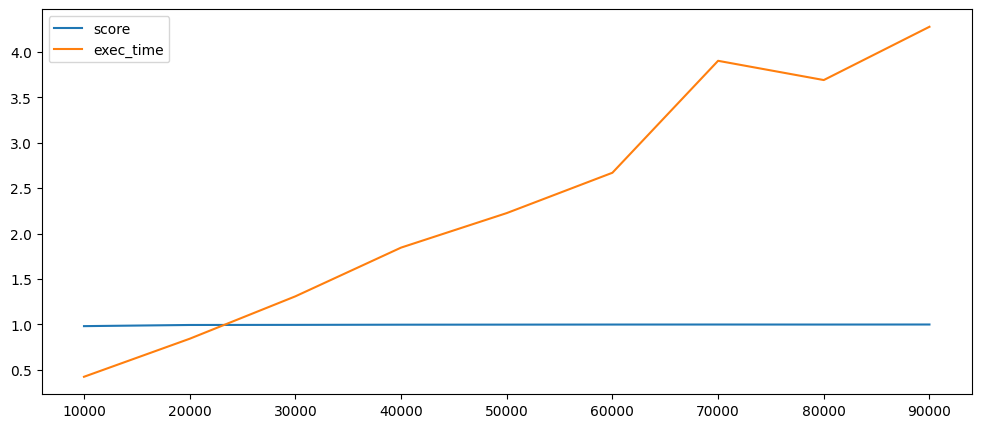

In [57]:
import time
freq_trellis = pd.read_csv(open("test_treillis_10elts.csv", "r"),delimiter=",")
input_treillis = pd.read_csv(open("dict_treillis_10elts.csv", "r"),delimiter=",")

data_treillis = [freq_trellis,input_treillis]
# NbElts,L_tot,rho,h,b,S,I,L,E,Mat,nu
entrees_treillis = ['L_tot','rho', 'h','b']
to_drop = ['NbElts','S', 'I', 'L', 'E','nu','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
split_train_treillis,split_test_treillis,split_target_train_treillis,split_target_test_treillis = split_and_drop(data_treillis,35000,entrees_treillis,to_drop,0.7)


"""my_grid = {'n_estimators': [i for i in range(400,1000,50)], 'max_depth': [i for i in range(10,20,1)],
              'max_features': [2, 3],
              'bootstrap': [True],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

Best params :  {'bootstrap': True, 'max_depth': 19, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
best score :  0.979399061814998
score :  0.980551636742296




grid_rf_treillis = GridSearchCV(RandomForestRegressor(), param_grid=my_grid, cv=5,n_jobs=-1,verbose=2)
grid_rf_treillis.fit(split_train_treillis, split_target_train_treillis)
print("OEEEEEEEEEEEEEEEE")
print("best params : ",grid_rf_treillis.best_params_)
print("best score : ",grid_rf_treillis.best_score_)
print("score : ",grid_rf_treillis.score(split_test_treillis, split_target_test_treillis))"""
score= []
exec_time = []
nb_i = []
for i in range(10000,100000,10000):
    split_train_treillis,split_test_treillis,split_target_train_treillis,split_target_test_treillis = split_and_drop(data_treillis,i,entrees_treillis,to_drop,0.7)
    rf_reg_treillis_var = RandomForestRegressor(n_estimators=700, max_depth=19, random_state=0,max_features=2,min_samples_leaf=1,min_samples_split=2)
    rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
    print("treillis : ",rf_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))
    Y_pred_treillis = rf_reg_treillis_var.predict(split_test_treillis)
    score.append(rf_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))
    nb_i.append(i)
    start = time.time()
    Y_pred_treillis = rf_reg_treillis_var.predict(split_test_treillis)
    end = time.time()

    exec_time.append(end-start)
    print("temps de calcul treillis : ",end-start)

plt.figure(figsize=(12, 5))
plt.plot(nb_i,score)
plt.plot(nb_i,exec_time)
plt.legend(
    ['score', 'exec_time'])

plt.show()

# shuffle data panda
data = data.sample(frac=1).reset_index(drop=True)
















In [58]:
print("score : ",score)
print("exec_time : ",exec_time)
print("nb_i : ",nb_i)

score :  [0.9798365727179712, 0.9925551399321265, 0.993756663117451, 0.9957262157063443, 0.9964611368299044, 0.9972930100312085, 0.9976205166678898, 0.9972776374692629, 0.9977861846402223]
exec_time :  [0.4219934940338135, 0.8408887386322021, 1.308002233505249, 1.844665765762329, 2.2249975204467773, 2.669280767440796, 3.9024481773376465, 3.6904616355895996, 4.277254819869995]
nb_i :  [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]


In [56]:
start = time.time()
Y_pred_treillis = rf_reg_treillis_var.predict(split_test_treillis)
end = time.time()

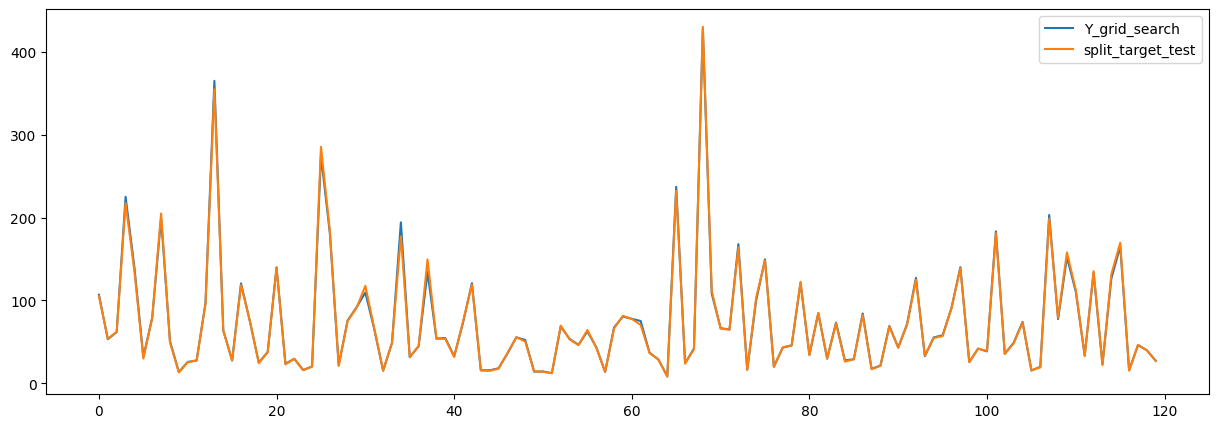

In [65]:
# plot prediction

plt.figure(figsize=(15, 5))
plt.plot((Y_pred_treillis)[:120])
plt.plot((np.array(split_target_test_treillis)[:120]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()


In [63]:
# print max delta between prediction and real value
print("max delta : ",np.max(np.abs(Y_pred_treillis - np.array(split_target_test_treillis))))

max delta :  812.8687916183245


# Treillis décorélé avec variation élement

In [1]:
#VISUALISATION ET IMPORT DE DONNEES
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns



#SKLEARN FUNCTIONS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import joblib

def split_and_drop(data,nbr_sample,input_features,droped_features,population_train):

    data  = pd.concat(data, axis=1)
    data = data.sample(n=nbr_sample)
    data = data.drop(droped_features, axis=1)
    split_train,split_test = train_test_split(data, train_size=population_train)
    print(split_train)
    split_target_train = split_train.drop(columns=input_features)
    split_target_test = split_test.drop(columns=input_features)
    split_train = split_train.drop(columns="freq1")
    split_test = split_test.drop(columns="freq1")
    return split_train,split_test,split_target_train,split_target_test



In [2]:
# import data
data = pd.read_csv(open("gen_data/dict_treillis.csv", "r"),delimiter=",")
freq = pd.read_csv(open("gen_data/test_treillis.csv", "r"),delimiter=",")


data_treillis = [data,freq]

# merge data


#NbElts_1,L_tot_1,rho_1,h_1,b_1,S_1,I_1,L_1,E_1,Mat_1,nu_1,NbElts_2,L_tot_2,rho_2,h_2,b_2,S_2,I_2,L_2,E_2,Mat_2,nu_2
to_drop = ['S_1','S_2','I_1','I_2','L_1','L_2','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat_1','Mat_2']
entrees_treillis = ['NbElts_1','L_tot_1','rho_1','h_1','b_1','E_1','nu_1','NbElts_2','L_tot_2','rho_2','h_2','b_2','E_2','nu_2']

# split data
split_train_treillis,split_test_treillis,split_target_train_treillis,split_target_test_treillis = split_and_drop(data_treillis,25000,entrees_treillis,to_drop,0.7)




       NbElts_1   L_tot_1  rho_1       h_1       b_1           E_1  nu_1  \
10532        45  0.575713   4510  0.020026  0.030191  1.140000e+11   0.3   
21770        34  0.738327   2500  0.052335  0.063976  6.900000e+10   0.3   
18117        42  0.208352   2500  0.018343  0.007419  6.900000e+10   0.3   
18892        35  0.386301   2700  0.023978  0.026427  6.900000e+10   0.3   
5587         20  0.771776   4510  0.046196  0.040751  1.140000e+11   0.3   
...         ...       ...    ...       ...       ...           ...   ...   
22389        50  0.308464   2500  0.007992  0.016452  6.900000e+10   0.3   
15174        48  0.977542   7800  0.046134  0.025459  2.030000e+11   0.3   
21921        22  0.711831   2400  0.032715  0.017638  3.000000e+10   0.3   
2308         28  0.453044   2700  0.008769  0.022322  6.900000e+10   0.3   
15923        29  0.277482   2700  0.022816  0.014008  6.900000e+10   0.3   

       NbElts_2   L_tot_2  rho_2       h_2       b_2           E_2  nu_2  \
10532      

In [35]:
# define model
rf_reg_treillis_var = RandomForestRegressor(n_estimators=700, max_depth=19, random_state=0,max_features=2,min_samples_leaf=1,min_samples_split=2)
rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis : ",rf_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))



C:\Users\enzoh\AppData\Local\Temp\ipykernel_26676\1728816661.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.8162872249953881


In [36]:
my_grid_treillis_var = {'n_estimators': [i for i in range(100,3000,100)],
                'max_depth': [16],
                }
rf_reg_treillis_var = RandomForestRegressor(random_state=0)
grid_search_treillis_var = GridSearchCV(rf_reg_treillis_var, my_grid_treillis_var, cv=5,scoring='r2',return_train_score=True,n_jobs=-1,verbose=2)
# fit and ravel 
grid_search_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())

print("treillis : ",grid_search_treillis_var.score(split_test_treillis, split_target_test_treillis))
print("best params : ",grid_search_treillis_var.best_params_)
print("best score : ",grid_search_treillis_var.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


In [34]:
for i in range(2,5):
    poly_reg_treillis_var = PolynomialRegression(i, fit_intercept=True, normalize=True)
    poly_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
    print("treillis : ",poly_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))
    

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


treillis :  0.7589913463540681


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


treillis :  0.8588678184951442


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


treillis :  0.9075257958291814


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


treillis :  0.9075257958291814


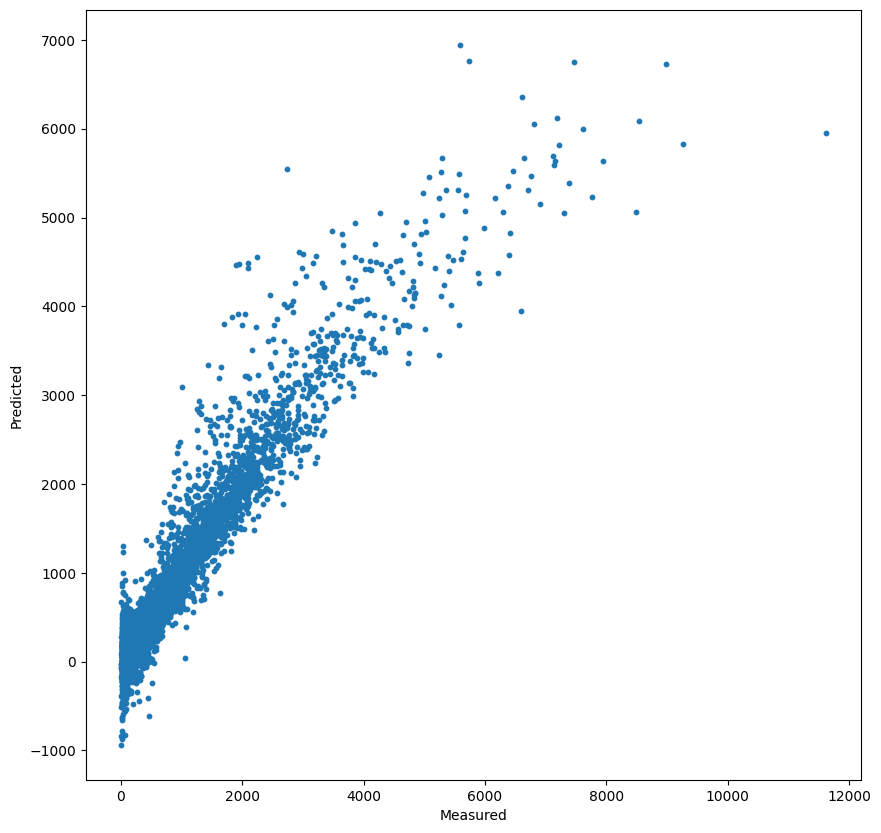

In [5]:
poly_4 = PolynomialRegression(4, fit_intercept=True, normalize=True)
poly_4.fit(split_train_treillis, split_target_train_treillis)
print("treillis : ",poly_4.score(split_test_treillis, split_target_test_treillis))

# plot 
plt.figure(figsize=(10, 10))
plt.scatter(split_target_test_treillis, poly_4.predict(split_test_treillis), s=10)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()



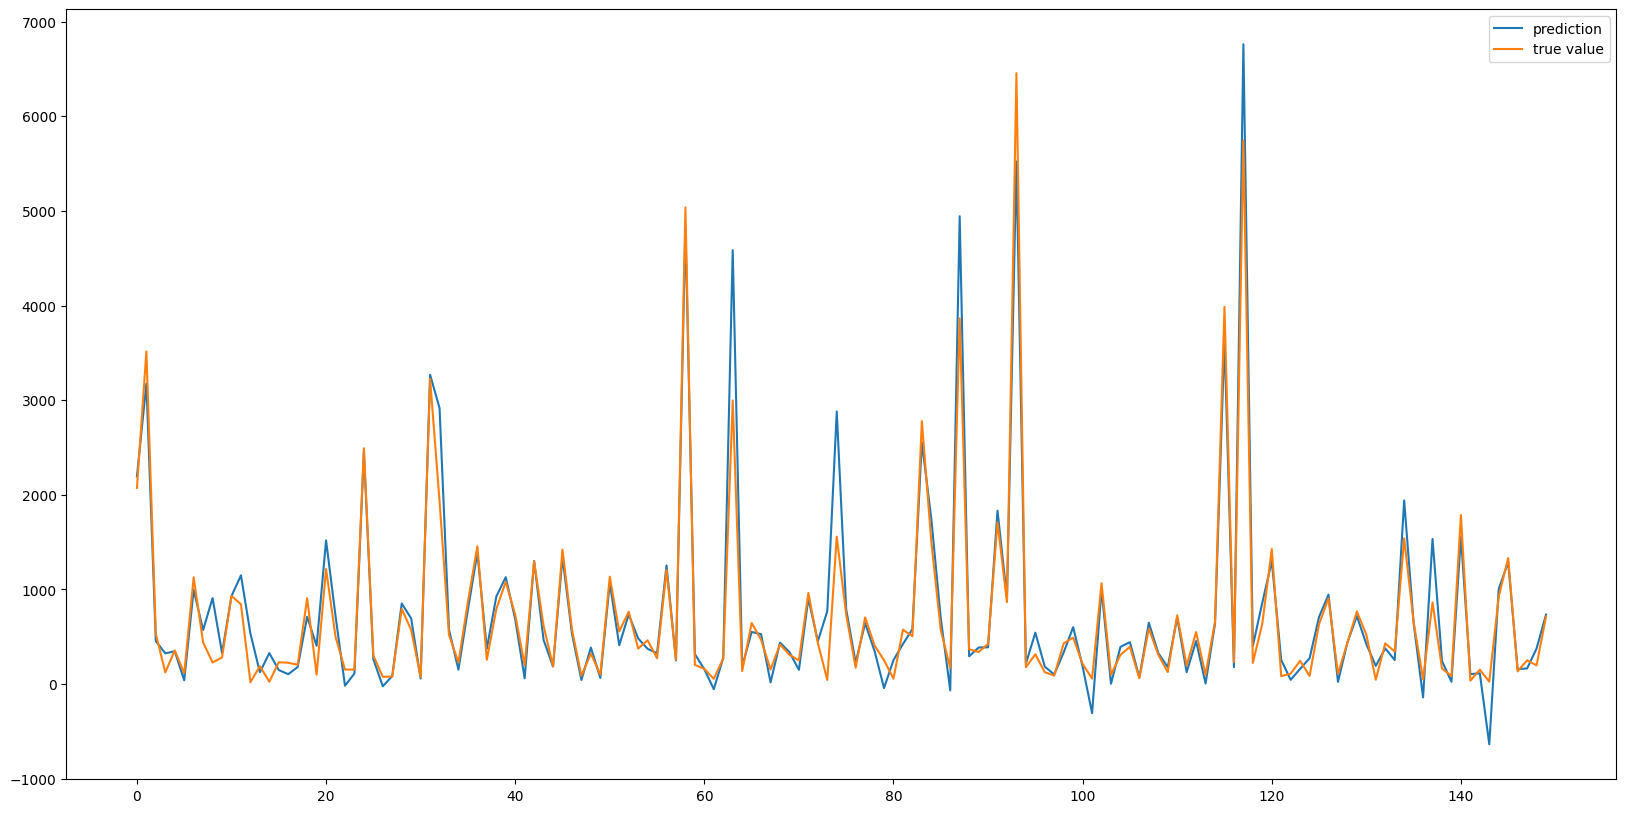

In [10]:

plt.figure(figsize=(20,10))
plt.plot(range(150),poly_4.predict(split_test_treillis)[:150],label='prediction')
plt.plot(range(150),split_target_test_treillis[:150],label='true value')
plt.legend()


In [43]:
# bayesian regression
from sklearn.linear_model import BayesianRidge
bayes_reg_treillis_var = BayesianRidge()
bayes_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis : ",bayes_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))

# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_reg_treillis_var = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='ls')
gb_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())
print("treillis : ",gb_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))

learning_rate = [i for i in range(5,100,5)]



#grid search for gradient boosting
my_grid_treillis_var = {'n_estimators': [900],

                'max_depth': [5],
                'learning_rate':[0.05],
                'loss': ['ls','lad','huber','quantile']}
                

gb_reg_treillis_var = GradientBoostingRegressor(random_state=0)
# grid_search_treillis_var = GridSearchCV(gb_reg_treillis_var, my_grid_treillis_var, cv=5,scoring='r2',return_train_score=True,n_jobs=-1,verbose=2)
# fit and ravel
# grid_search_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())
"""print("treillis : ",grid_search_treillis_var.score(split_test_treillis, split_target_test_treillis))
print("best params : ",grid_search_treillis_var.best_params_)
print("best score : ",grid_search_treillis_var.best_score_)"""

gb_reg_treillis_var = GradientBoostingRegressor(n_estimators=2900, learning_rate=0.05, max_depth=5, random_state=0, loss='ls')
gb_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())
print("treillis : ",gb_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))

#best params :  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 2900}







c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


treillis :  0.5431997392225285
treillis :  0.9262294602050299


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


treillis :  0.9429613564287803


In [52]:
import time
start = time.time()
pred = rf_reg_treillis_var.predict(split_test_treillis)
end = time.time()
print("time : ",end-start)

time :  1.0826423168182373


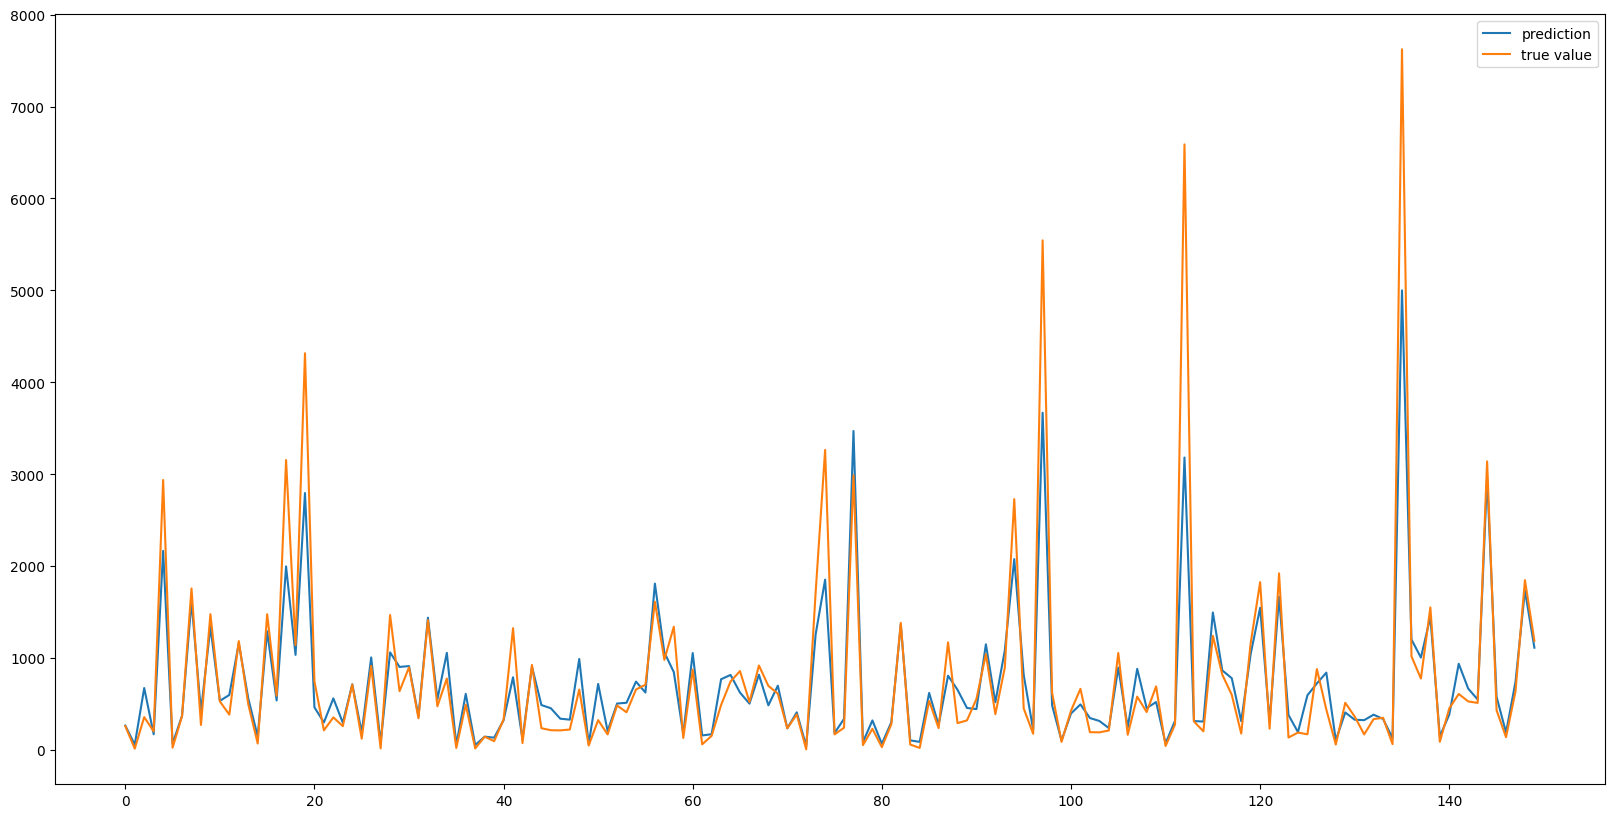

In [58]:
y_pred = pred
# plot 150 random predictions and their true values
plt.figure(figsize=(20,10))
plt.plot(range(150),y_pred[:150],label='prediction')
plt.plot(range(150),split_target_test_treillis[:150],label='true value')
plt.legend()


In [9]:

from sklearn.ensemble import BaggingRegressor
bag_reg_treillis_var = BaggingRegressor(random_state=0)
bag_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis  bag: ",bag_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))

from sklearn.ensemble import ExtraTreesRegressor
extra_reg_treillis_var = ExtraTreesRegressor(random_state=0)
extra_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis  extra: ",extra_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


treillis  bag:  0.8868930458770214


C:\Users\enzoh\AppData\Local\Temp\ipykernel_28620\4135267450.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis  extra:  0.9016255711350508


In [15]:
# grids search for bagging and extra trees
my_grid_treillis_var = {'n_estimators': [400],}

bag_reg_treillis_var = BaggingRegressor(random_state=0)
grid_search_treillis_var = GridSearchCV(bag_reg_treillis_var, my_grid_treillis_var, cv=4,scoring='r2',return_train_score=True,n_jobs=-1,verbose=2)
# fit and ravel
grid_search_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())
print("treillis : ",grid_search_treillis_var.score(split_test_treillis, split_target_test_treillis))
print("best params : ",grid_search_treillis_var.best_params_)
print("best score : ",grid_search_treillis_var.best_score_)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
treillis :  0.9153884340943451
best params :  {'n_estimators': 400}
best score :  0.901419422419219


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


time :  0.7926902770996094


ValueError: x and y must have same first dimension, but have shapes (80,) and (7420,)

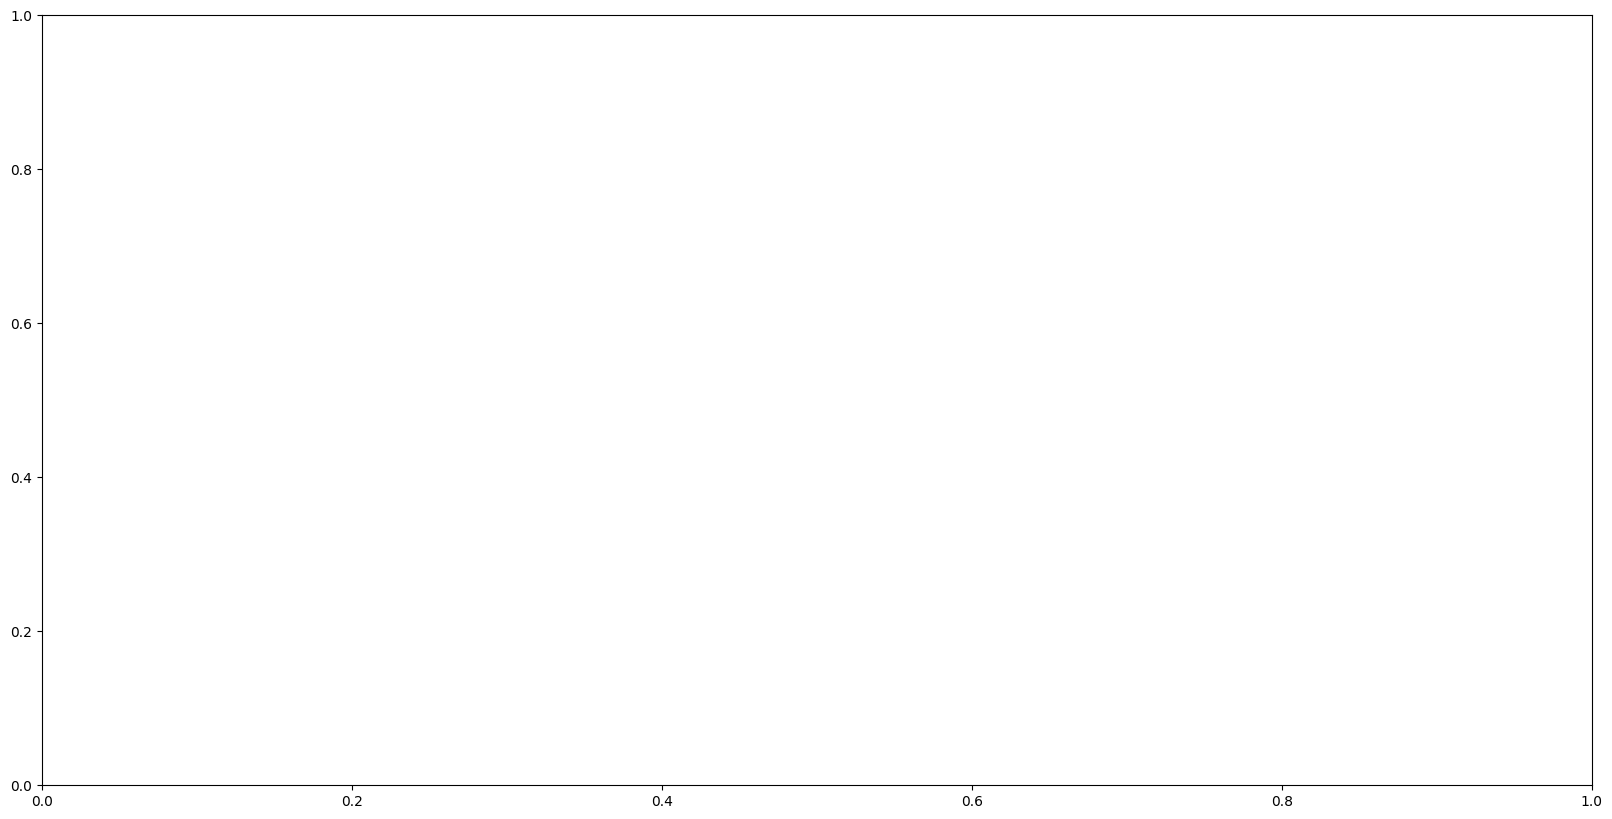

In [20]:
# plot 80 last predictions and their true values
import time 
bag_reg_treillis_var = BaggingRegressor(random_state=0,n_estimators=400)
bag_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
start = time.time()
y_pred = bag_reg_treillis_var.predict(split_test_treillis)
end = time.time()
print("time : ",end-start)


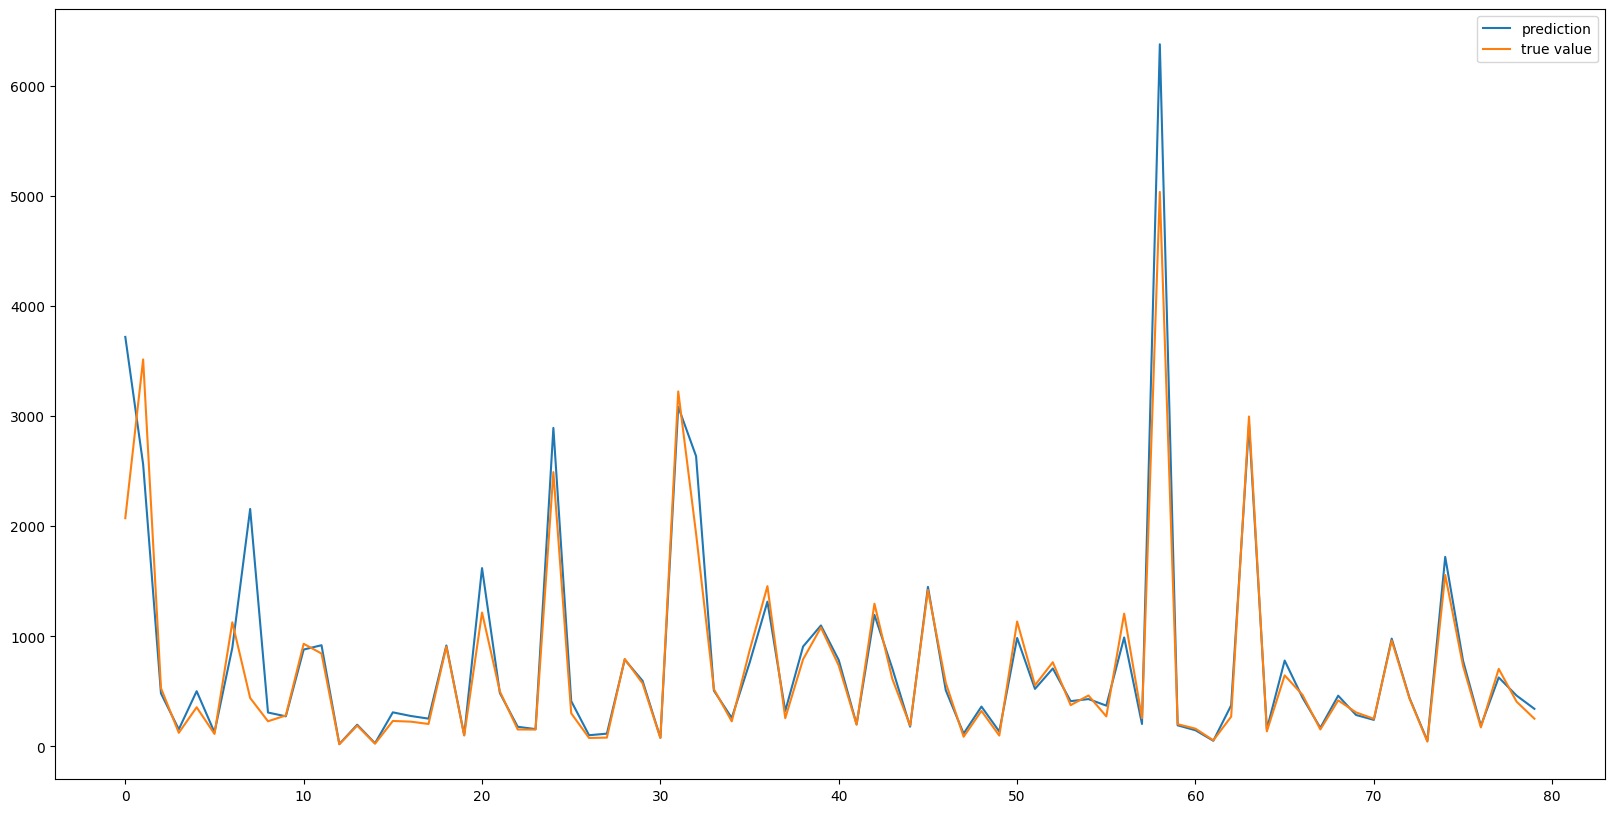

In [22]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:80],label='prediction')
plt.plot(np.array(split_target_test_treillis[:80]),label='true value')
plt.legend()


In [30]:
# extra trees grid search
my_grid_treillis_var = {'n_estimators': [900,1100,1300,1500,1700,2000],
                'max_depth': [20],
                }

extra_reg_treillis_var = ExtraTreesRegressor(random_state=0)
grid_search_treillis_var = GridSearchCV(extra_reg_treillis_var, my_grid_treillis_var, cv=4,scoring='r2',return_train_score=True,n_jobs=-1,verbose=2)
# fit and ravel
grid_search_treillis_var.fit(split_train_treillis, split_target_train_treillis.values.ravel())
print("treillis : ",grid_search_treillis_var.score(split_test_treillis, split_target_test_treillis))
print("best params : ",grid_search_treillis_var.best_params_)
print("best score : ",grid_search_treillis_var.best_score_)



Fitting 4 folds for each of 6 candidates, totalling 24 fits


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


treillis :  0.9140484241632132
best params :  {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1700}
best score :  0.8996417056300021


C:\Users\enzoh\AppData\Local\Temp\ipykernel_28620\579863761.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


score :  0.9032454051641317
time :  1.6708698272705078


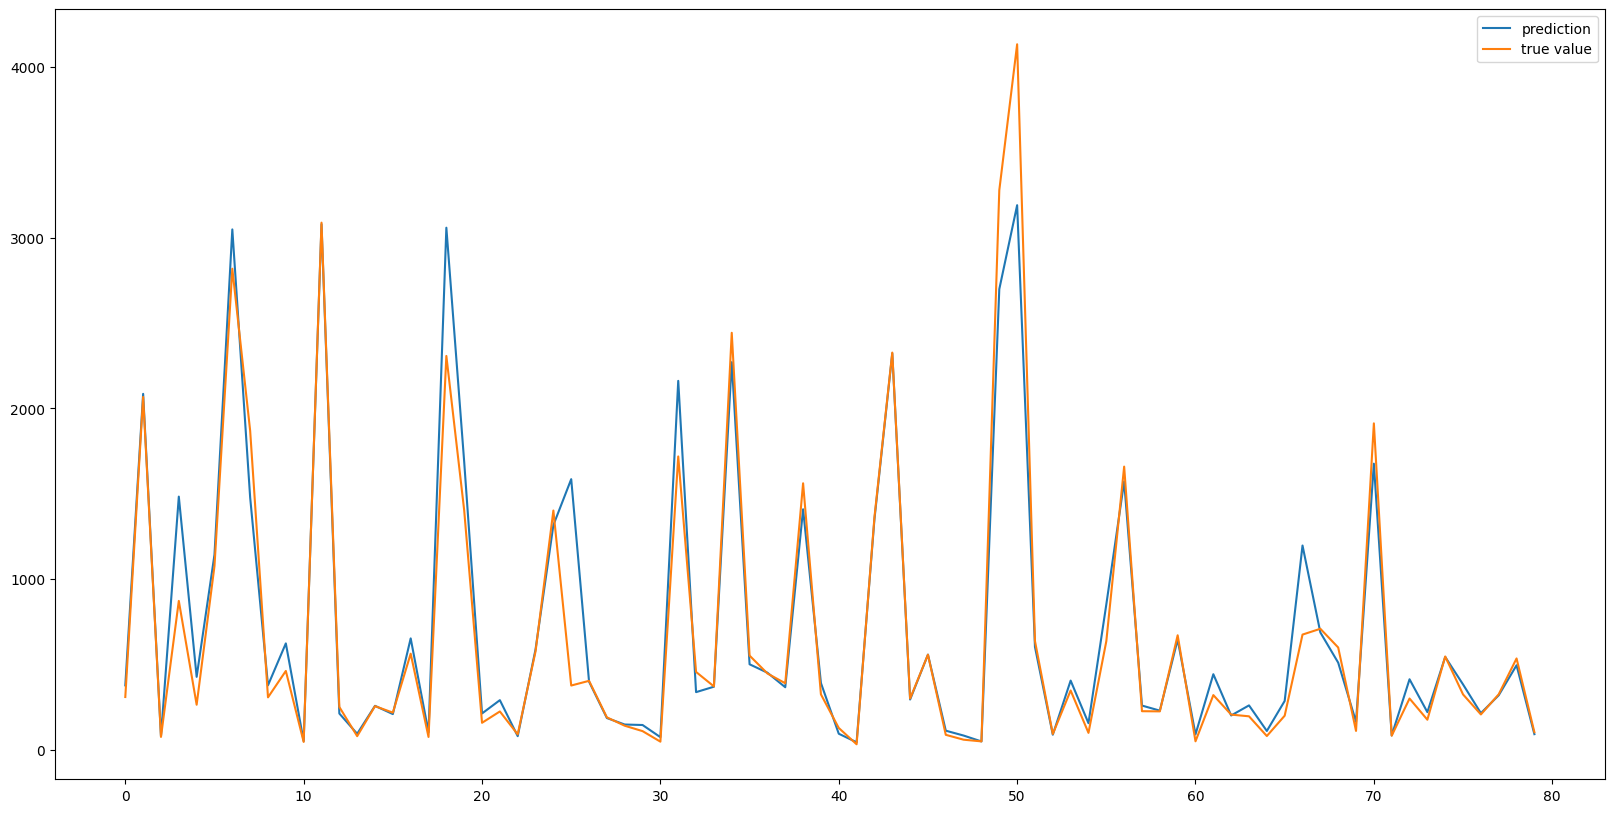

In [10]:
extra_reg_treillis_var = ExtraTreesRegressor(random_state=0,n_estimators=900,max_depth=20)
extra_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("score : ",extra_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))
start = time.time()
y_pred = extra_reg_treillis_var.predict(split_test_treillis)
end = time.time()

print("time : ",end-start)

plt.figure(figsize=(20,10))
plt.plot(y_pred[:80],label='prediction')
plt.plot(np.array(split_target_test_treillis[:80]),label='true value')
plt.legend()


In [6]:

from sklearn.ensemble import RandomForestRegressor
forest_reg_treillis_var = RandomForestRegressor()
forest_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis forest : ",forest_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))







C:\Users\enzoh\AppData\Local\Temp\ipykernel_28620\670434917.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis forest :  0.9009208101218394


In [20]:
pred_extra = extra_reg_treillis_var.predict(split_test_treillis).reshape(-1,1)
pred_forest = forest_reg_treillis_var.predict(split_test_treillis).reshape(-1,1)

delta_extra = np.abs(pred_extra - split_target_test_treillis)
delta_forest = np.abs(pred_forest - split_target_test_treillis)


In [22]:
print("extra trees mean : ",np.mean(delta_extra))
print("extra trees std : ",np.std(delta_extra))
print("extra trees max : ",np.max(delta_extra))
print("extra trees min : ",np.min(delta_extra))

print("forest mean : ",np.mean(delta_forest))
print("forest std : ",np.std(delta_forest))
print("forest max : ",np.max(delta_forest))
print("forest min : ",np.min(delta_forest))



extra trees mean :  freq1    119.154446
dtype: float64
extra trees std :  freq1    286.016063
dtype: float64
extra trees max :  freq1    4870.761227
dtype: float64
extra trees min :  freq1    0.013416
dtype: float64
forest mean :  freq1    125.699056
dtype: float64
forest std :  freq1    287.244242
dtype: float64
forest max :  freq1    5319.651906
dtype: float64
forest min :  freq1    0.020241
dtype: float64


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduc

In [19]:
# print mean of the delta
print("mean delta extra : ",delta_extra/len(pred_extra))
print("mean delta forest : ",delta_forest/len(pred_forest))

# print the last quartile of the delta
print("last quartile delta extra : ",np.quantile(delta_extra,0.1))



mean delta extra :  freq1    119.154446
dtype: float64
mean delta forest :  freq1    125.699056
dtype: float64
last quartile delta extra :  893658.3484865695
